# Lecture 3 Demo: ML Fundamentals

## Imports

In [1]:
# import the libraries
import os
import sys
sys.path.append(os.path.join("code"))
from plotting_functions import *
from utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

DATA_DIR = os.path.join("data/")
pd.set_option("display.max_colwidth", 200)

## The Dataset

Let's bring back King County housing sale prediction data from the course introduction video. You can download the data from [here](https://www.kaggle.com/harlfoxem/housesalesprediction). 

In [2]:
housing_df = pd.read_csv(DATA_DIR + 'kc_house_data.csv')
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## What's the Question?

The question we are considering is:

**Given a particular property in King County with some features, how should we assess that property's value (price) ?**

> Is this a classification problem or a regression problem? 

## Exploratory Data Analysis

In [3]:
# How many data points do we have? 

In [4]:
# What are the columns in the dataset? 

Let's explore some features. Let's try the `describe()` method

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
housing_df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


Do we need to keep all the columns? 

### Activity: Discuss the following questions in your group

- Which columns should we keep and which ones should we drop? Why?
- Fill out this table in Markdown with your group:

| Feature       | Keep or Discard | Why? |
|---------------|-----------------|------|
| bathrooms     |                 |      |
| bedrooms      |                 |      |
| condition     |                 |      |
| date          |     discard     |      |
| floors        |                 |      |
| grade         |                 |      |
| id            |     discard         |      |
| lat           |                 |      |
| long          |                 |      |
| price         |                 |      |
| sqft_above    |                 |      |
| sqft_basement |                 |      |
| sqft_living   |                 |      |
| sqft_living15 |                 |      |
| sqft_lot      |                 |      |
| sqft_lot15    |                 |      |
| view          |                 |      |
| waterfront    |                 |      |
| yr_built      |                 |      |
| yr_renovated  |                 |      |
| zipcode       |                 |      |

In [8]:
housing_df['id'].unique().shape[0]

21436

In [9]:
housing_df['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [18]:
dates = pd.to_datetime(['20141013T000000', '20141209T000000', '20150218T000000'], format='%Y%m%dT%H%M%S')

In [ ]:
# What are the value counts of the `waterfront` feature? 
housing_df['waterfront'].value_counts()

In [ ]:
# What are the value_counts of `yr_renovated` feature? 
housing_df['yr_renovated'].value_counts()

Many opportunities to clean the data but we'll stop here. 

Let's create `X` and `y`. 

In [110]:
X = housing_df.drop(columns = ['date', 'id', 'lat', 'long', 'price'])

In [111]:
y = housing_df['price']

<br><br>

## Baseline model 

In [78]:
# Train a DummyRegressor model 

from sklearn.dummy import DummyRegressor # Import DummyRegressor 

# Create a class object for the sklearn model.
dummy_regr = DummyRegressor()


# fit the dummy regressor
dummy_regr.fit(X, y)


# score the model 
dummy_regr.score(X, y)

0.0

How to interpret the score here? 

In [79]:
# predict on X using the model
dummy_regr.predict(X)

array([540088.14176653, 540088.14176653, 540088.14176653, ...,
       540088.14176653, 540088.14176653, 540088.14176653], shape=(21613,))

<br><br>

## Decision tree model 

In [80]:
# Train a decision tree model 

from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor 

# Create a class object for the sklearn model.
dt_regr = DecisionTreeRegressor()


# fit the decision tree regressor 
dt_regr.fit(X, y)

# score the model 
dt_regr.score(X, y)

0.9991302004579986

Our accuracy is perfect!

### Activity: Discuss the following questions in your group

- Should we be happy with this model and deploy it? Why or why not?

What's the depth of this model? 

In [81]:
dt_regr.get_depth()

41

<br><br>

## Data splitting 

Let's split the data and  
- Train on the train split 
- Score on the test split

In [115]:
# Split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [116]:
# Instantiate a class object 
dt = DecisionTreeRegressor(random_state=123)

# Train a decision tree on X_train, y_train
dt.fit(X_train, y_train)

# Score on the train set
dt.score(X_train, y_train)


0.9994369892706281

In [117]:
# Score on the test set
dt.score(X_test, y_test)


0.6463495437536587

### Activity: Discuss the following questions in your group

- Why is there a large gap between train and test scores? 
- What would be the effect of increasing or decreasing `test_size`?
- Why are we setting the `random_state`? Is it a good idea to try a bunch of values for the `random_state` and pick the one which gives the best scores? 
- Would it be possible to further improve the scores? 

<br><br>

## Hyperparameter optimization 

Let's try out different tree depths. 

In [118]:
# max_depth= 1 
dt = DecisionTreeRegressor(max_depth=1, random_state=123) 
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=123)

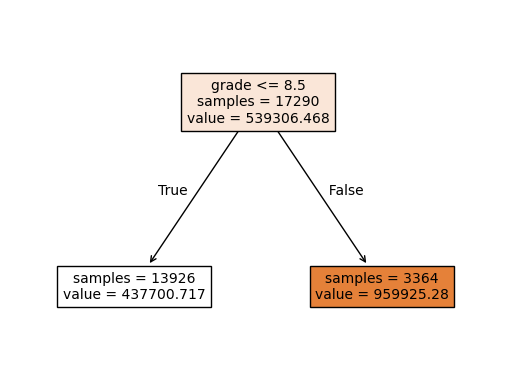

In [119]:
# Visualize your decision stump
from sklearn.tree import plot_tree 
plot_tree(dt, feature_names = X.columns.tolist(), impurity=False, filled=True, fontsize=10);

In [120]:
dt.score(X_train, y_train) # Score on the train set

0.3209427041566191

In [121]:
dt.score(X_test, y_test) # Score on the test set

0.31767136668453344

- How do these scores compare to the previous scores? 

Let's try depth 10. 

In [122]:
dt = DecisionTreeRegressor(max_depth=10, random_state=123) # max_depth= 10 
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=123)

In [123]:
dt.score(X_train, y_train) # Score on the train set

0.8630504589135257

In [124]:
dt.score(X_test, y_test) # Score on the test set

0.7040015483270516

Any improvements? Which depth should we pick? 

<br><br>

## Single validation set

We are using the test data again and again. How about creating a validation set to pick the right depth and assessing the final model on the test set?   

In [129]:
# Create a validation set 
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [137]:
tr_scores = []
valid_scores = []
depths = np.arange(1, 35, 2)

for depth in depths:  
    # Create and fit a decision tree model for the given depth  
    dt = DecisionTreeRegressor(max_depth=depth, random_state=123)
    
    # Calculate and append r2 scores on the training and validation sets
    dt.fit(X_tr, y_tr)
    dt_train_score = dt.score(X_tr, y_tr)
    tr_scores.append(dt_train_score)
    
    dt_val_score = dt.score(X_valid, y_valid)
    valid_scores.append(dt_val_score)
    
results_single_valid_df = pd.DataFrame({"train_score": tr_scores, 
                           "valid_score": valid_scores},index = depths)
results_single_valid_df

,train_score,valid_score
1,0.319559,0.326616
3,0.557432,0.493658
5,0.689675,0.622371
7,0.770597,0.643671
9,0.841724,0.671093
11,0.897691,0.660761
13,0.939682,0.666194
15,0.965986,0.631268
17,0.982602,0.620419
19,0.991084,0.600903


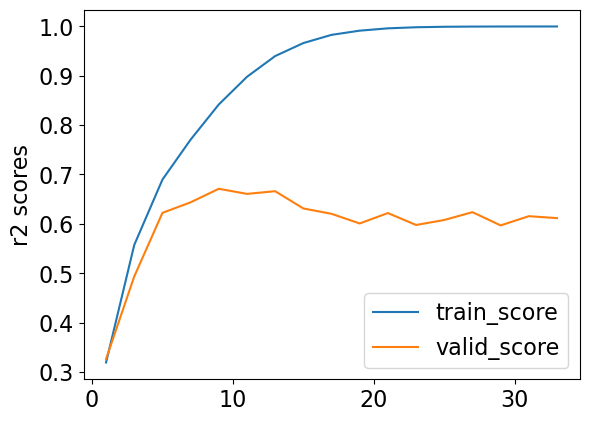

In [138]:
results_single_valid_df[['train_score', 'valid_score']].plot(ylabel='r2 scores');

What depth gives the "best" validation score? 

In [139]:
# What depth gives the "best" validation score?
best_depth = results_single_valid_df['valid_score'].idxmax() 
best_depth

np.int64(9)

## Cross-validation

In [148]:
depths = np.arange(1, 35, 2)

cv_train_scores = []
cv_valid_scores = []
for depth in depths: 
    # Create and fit a decision tree model for the given depth   
    dt = DecisionTreeRegressor(max_depth = depth, random_state=123)

    dt.fit(X_tr, y_tr)
    # Carry out cross-validation
    results = cross_validate(dt, X_train, y_train, cv=5, return_train_score=True)
    cv_train_scores.append(results['train_score'].mean())
    cv_valid_scores.append(results['test_score'].mean())
    


In [149]:
results_df = pd.DataFrame({"train_score": cv_train_scores, 
                           "valid_score": cv_valid_scores
                           },
                           index=depths
                            )
results_df

,train_score,valid_score
1,0.321050,0.322465
3,0.556130,0.513351
5,0.685370,0.608673
7,0.771487,0.630898
9,0.843011,0.663942
11,0.898654,0.658259
13,0.938218,0.641708
15,0.963990,0.629101
17,0.980723,0.593044
19,0.989968,0.628611


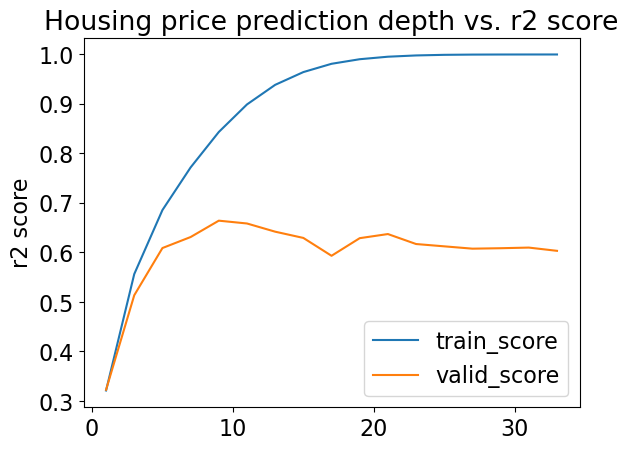

In [150]:
results_df[['train_score', 'valid_score']].plot(ylabel='r2 score', title='Housing price prediction depth vs. r2 score');

What's the "best" depth with cross-validation? 

In [151]:
best_depth = results_df['valid_score'].idxmax()
best_depth

np.int64(9)

### Discuss the following questions in your group

1.	At which depth(s) are we underfitting? At which depth(s) are we overfitting?
2.	Above, we chose the depth that gives us the best cross-validation score. Is it always a good idea to select this depth? What if a simpler model with a smaller max_depth gives nearly the same cross-validation score?
3.	If our main concern is test scores, why don't we use the test set during training?
4.	Do you trust our hyperparameter optimization process? In other words, do you believe we've found the best possible depth?

<br><br>

## Assessing on the test set

In [152]:
# Train a model with the best depth of the full training data
dt_final = DecisionTreeRegressor(max_depth=best_depth, random_state=123)
dt_final.fit(X_train, y_train)
dt_final.score(X_train, y_train)

0.8322384340765434

In [153]:
dt_final.score(X_test, y_test)

0.7087679449533417

How do these scores compare to the scores when we used a single validation set? 

### Learned model 

In [154]:
#What's the depth of the model? 
dt_final.get_depth()

9

In [155]:
# plot_tree(dt_final, feature_names = X_train.columns.tolist(), impurity=False, filled=True);

In [156]:
# Which features are the most important ones?
dt_final.feature_importances_

array([2.04656266e-04, 1.77330304e-02, 2.45859081e-01, 2.31350407e-02,
       2.86567642e-03, 3.33145492e-02, 7.66287287e-03, 1.64943456e-03,
       4.69060830e-01, 4.00049173e-03, 7.08737461e-04, 8.50571550e-02,
       5.82986556e-04, 5.26893224e-02, 4.10096109e-02, 1.44665238e-02])

Let's examine feature importances. 

In [157]:
df = pd.DataFrame( 
    data = {
        "features": dt_final.feature_names_in_,
        "feature_importances": dt_final.feature_importances_
    }
)
df.sort_values("feature_importances", ascending=False)

,features,feature_importances
8,grade,0.469061
2,sqft_living,0.245859
11,yr_built,0.085057
13,zipcode,0.052689
14,sqft_living15,0.041010
5,waterfront,0.033315
3,sqft_lot,0.023135
1,bathrooms,0.017733
15,sqft_lot15,0.014467
6,view,0.007663


<br><br>

## Concepts we revised in this demo

- Exploratory data analysis
- Baselines
- Data splitting: train, test, validation sets
- Cross validation
- Underfitting, overfitting, the fundamental tradeoff
- The golden rule of supervised ML

## Typical steps to build a supervised machine learning model

- Ensure the data is appropriate for your task (e.g., labeled data, suitable features).
- Split the data into training and testing sets.
- Perform exploratory data analysis (EDA) on the training data to understand distributions, identify patterns, and detect potential issues.
- Preprocess and encode features (e.g., handle missing values, scale features, encode categorical variables).
    - coming up 
- Build a baseline model to establish a performance benchmark.
- Train multiple candidate models on the training data.
    - coming up  
- Select promising models and perform hyperparameter tuning using cross-validation.
    - coming up 
- Evaluate the generalization performance of the best model on the test set.


<br><br>